In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
def regresionSimple(x,y):
    """Axusta os datos dos vectore x e y a unha resta dada pola ec. y=a + bx
    Parametros:
    x vector con medidas da magnitud x
    y vector con medidas da magnitud y
    Devolve:
    a coeficiente a
    b coeficiente b
    sa incerteza de a
    sb incerteza de b
    r coeficiente de regresion lineal """
    n=len(x)
    sx=sum(x); sy=sum(y); xx=np.dot(x,x); yy=np.dot(y,y); xy=np.dot(x,y);
    denom=(n*xx - sx**2)
    b=(n*xy - sx*sy)/denom
    a=(xx*sy - sx*xy)/denom
    s=sqrt(sum((y-a-b*x)**2)/(n-2))
    sa=s*sqrt(xx/(n*xx-sx**2))
    sb=s*sqrt(n/(n*xx-sx**2))
    r=(n*xy-sx*sy)/sqrt((n*xx-sx**2)*(n*yy-sy**2))
    return [a,b, sa, sb, r, s]

In [3]:
#Presiones en bares y temperaturas en K

#Calentamiento oh

p_c_oh = np.array([5000, 5300, 5500, 6700, 7000, 7500, 8300, 9400, 10600, 11900, 13400, 15400, 17200, 19100, 21700, 23800, 26900, 29800, 32800, 36000, 39700, 43500, 47200, 51300, 56400, 61600, 66800, 72700, 78800, 85300, 93000, 100700, 109200, 117800, 127000, 138000, 149400, 161500, 173200, 186500, 201000, 215400, 230800, 246800, 264300, 283800, 303900, 323800, 343200, 367100, 390100, 417500, 440800, 468900, 498900])

T_c_oh = np.array([290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398])

#Enfriamiento oh

p_e_oh = np.array([506000, 477800, 448100, 423200, 397900, 374400, 351300, 329300, 308200, 288600, 270000, 252400, 235500, 219600, 204300, 187200, 170400, 149800, 137500, 126800, 116600, 108200, 100700, 93500])

T_e_oh = np.array([399, 397, 395, 393, 391, 389, 387, 385, 383, 381, 379, 377, 375, 373, 371, 369, 367, 365, 363, 361, 359, 357, 355, 353])

#Calentamiento agua

p_c_agua = np.array([7700, 10600, 16300, 21400, 26000, 30500, 34600, 38700, 44300, 47600, 50900, 56700, 62700, 69200, 73500, 75500, 78800, 81600, 85300, 89400, 91500, 94700, 96800, 99300, 102500, 104700, 107800, 113000, 117000, 122200, 128300, 134300, 138500, 144000, 152900, 160000, 168300, 177200, 185300, 198000, 209800, 221000, 230000, 242200, 252500, 264600, 274500, 285800, 297000, 304700, 312700, 320400, 333000, 344000, 354000, 362000, 374200, 380900, 391900, 401900, 410000, 419100, 430300, 438300, 445600, 452700, 461200, 468000, 475800, 485000, 493300, 496900, 499300])

T_c_agua = np.array([310.4, 317.8, 325.8, 331.7, 336.1, 339.7, 342.4, 345.4, 348.3, 350.2, 351.6, 354.5, 357.2, 360.6, 362.0, 362.8, 364.0, 365.1, 366.4, 367.9, 368.5, 369.5, 370.2, 371.0, 371.8, 372.5, 373.5, 374.9, 376.1, 377.4, 379.3, 380.5, 381.6, 382.7, 384.6, 386.1, 387.6, 389.2, 390.7, 392.8, 394.7, 396.3, 397.7, 399.3, 400.7, 402.1, 403.5, 404.7, 406.0, 406.9, 407.9, 408.7, 410.0, 411.1, 412.2, 412.9, 414.1, 414.7, 415.8, 416.6, 417.2, 418.0, 419.1, 419.8, 420.5, 421.0, 421.7, 422.2, 422.8, 423.5, 424.2, 424.5, 424.8])

#Enfriamiento agua

p_e_agua = np.array([498600, 488100, 476500, 462600, 448700, 432600, 420600, 409000, 400900, 391300,
    384300, 373500, 362600, 351400, 341500, 329300, 318800, 305300, 297800, 276100,
    258400, 243400, 234700, 222600, 214400, 210100, 202900, 196900, 192700, 187500,
    190700, 170500, 163800, 154300, 147300, 138800, 132700, 123200, 116900, 110500,
    105300, 102900, 97900, 93500, 90000, 87700, 85200, 83500, 81500, 79000, 76000,
    73600, 71300, 69700, 68200, 66500, 65200, 62300, 61500])

T_e_agua = np.array([424.8, 424.1, 423.2, 422.2, 421.1, 419.8, 418.8, 417.8, 417.1, 416.3,
    415.6, 414.6, 413.6, 412.5, 411.4, 410, 408.9, 407.5, 406.5, 404.5,
    402.4, 400.3, 399.1, 397.4, 396.2, 395.5, 394.4, 393.5, 392.8, 391.7,
    390.8, 389.1, 388, 386.2, 384.8, 382.9, 381.4, 378.6, 376.9, 375.7,
    373.4, 372.8, 370.6, 368.9, 367.6, 366.5, 365.3, 364.5, 363.6, 362.3,
    361.2, 359.8, 358.8, 357.8, 357, 356, 355.2, 353.6, 353.1])



In [4]:
## Regresiones, [a,b, sa, sb, r, s]

reg_c_oh = regresionSimple(1/(T_c_oh),np.log(p_c_oh))
reg_e_oh = regresionSimple(1/T_e_oh,np.log(p_e_oh))
reg_c_agua = regresionSimple(1/T_c_agua,np.log(p_c_agua))
reg_e_agua = regresionSimple(1/T_e_agua,np.log(p_e_agua))

"""print(reg_c_oh)
print(reg_e_oh)
print(reg_c_agua)
print(reg_e_agua)"""

l_c_oh = -reg_c_oh[1]*8.314/46.068
l_e_oh = -reg_e_oh[1]*8.314/46.068
l_c_agua = -reg_c_agua[1]*8.314/18
l_e_agua = -reg_e_agua[1]*8.314/18

print(l_c_oh)
print(l_e_oh)
print(l_c_agua)
print(l_e_agua)

s_l_c_oh = -reg_c_oh[3]*8.314/46.068
s_l_e_oh = -reg_e_oh[3]*8.314/46.068
s_l_c_agua = -reg_c_agua[3]*8.314/18
s_l_e_agua = -reg_e_agua[3]*8.314/18

print(reg_c_oh[3]*8.314/46.068)
print(reg_e_oh[3]*8.314/46.068)
print(reg_c_agua[3]*8.314/18)
print(reg_e_agua[3]*8.314/18)

914.517193991885
952.1618391312342
2196.5128127983644
2062.2780832181006
3.425608353807195
11.43363087418297
4.908967345760178
18.39227683921593


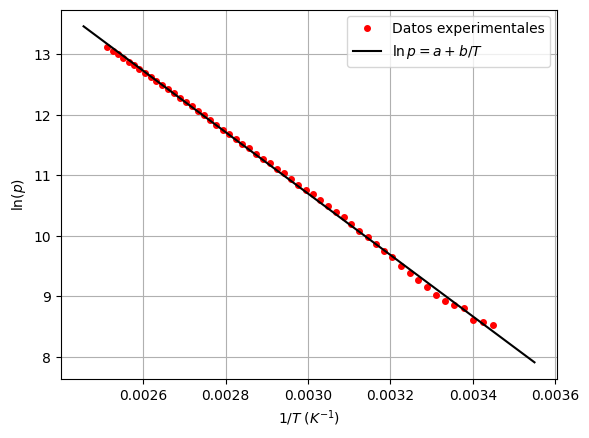

In [5]:
#Plot calentamiento oh

x = np.linspace(0.002455,0.00355,200)

plt.plot(1/T_c_oh,np.log(p_c_oh),'o',markersize=4,color='red',label='Datos experimentales')
plt.plot(x,reg_c_oh[0] + reg_c_oh[1]*x,color='black',label=r'$\ln p = a +b/T$')
plt.xlabel(r'$1/T \; (K^{-1})$')
plt.ylabel(r'$\ln(p)$')
plt.grid(True)
plt.legend(loc='upper right')

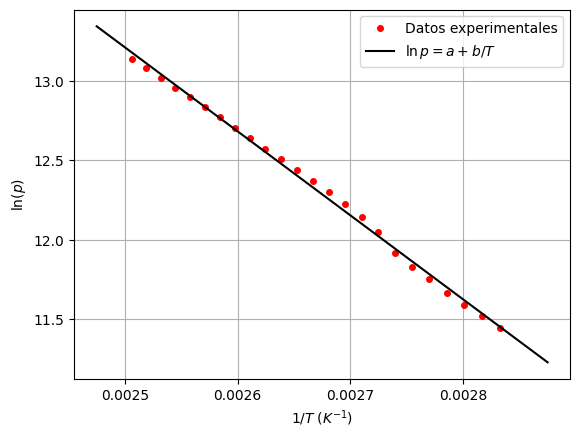

In [6]:
#Plot enfriamiento oh

from matplotlib.ticker import MultipleLocator

x = np.linspace(0.002475,0.002875,200)

plt.plot(1/T_e_oh,np.log(p_e_oh),'o',markersize=4,color='red',label='Datos experimentales')
plt.plot(x,reg_e_oh[0] + reg_e_oh[1]*x,color='black',label=r'$\ln p = a +b/T$')
plt.xlabel(r'$1/T \; (K^{-1})$')
plt.ylabel(r'$\ln(p)$')
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.0001))

plt.legend(loc='upper right')

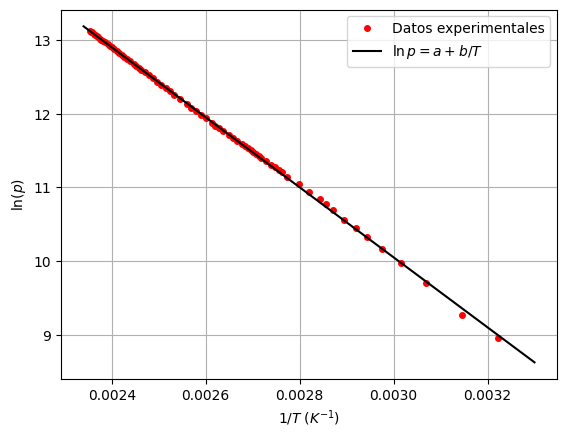

In [7]:
#Plot calentamiento agua

x = np.linspace(0.00234,0.0033,200)

plt.plot(1/T_c_agua,np.log(p_c_agua),'o',markersize=4,color='red',label='Datos experimentales')
plt.plot(x,reg_c_agua[0] + reg_c_agua[1]*x,color='black',label=r'$\ln p = a +b/T$')
plt.xlabel(r'$1/T \; (K^{-1})$')
plt.ylabel(r'$\ln(p)$')
plt.grid(True)
plt.legend(loc='upper right')

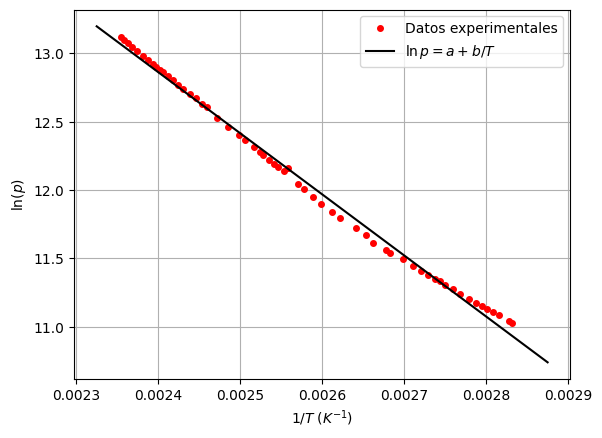

In [8]:
#Plot enfriamiento agua

x = np.linspace(0.002325,0.002875,200)

plt.plot(1/T_e_agua,np.log(p_e_agua),'o',markersize=4,color='red',label='Datos experimentales')
plt.plot(x,reg_e_agua[0] + reg_e_agua[1]*x,color='black',label=r'$\ln p = a +b/T$')
plt.xlabel(r'$1/T \; (K^{-1})$')
plt.ylabel(r'$\ln(p)$')
plt.grid(True)
plt.legend(loc='upper right')

Los valores de los parametros a ajustar son [ 1.03009983e+11 -4.86821260e+03]
Las incertidumbres son: [3.09323013e+09 1.15338913e+01]
Los valores de los parametros a ajustar son [ 1.61009798e+11 -5.04909372e+03]
Las incertidumbres son: [2.51813799e+10 6.05098693e+01]
40474.31954050032
911.2217853927499
95.89277207356061
10.92035801312848


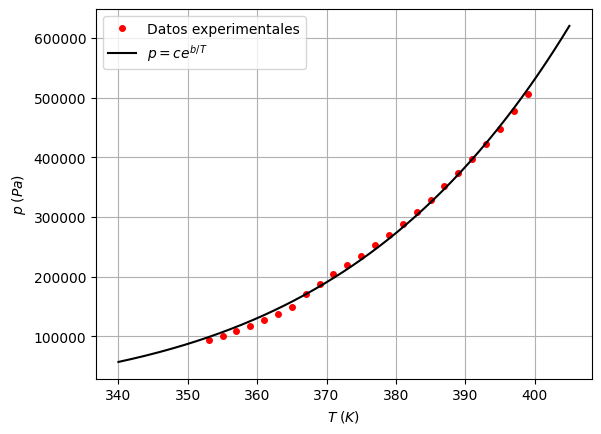

In [13]:
#Ajustes exponenciales de p(T)

import scipy.optimize as so

def ajuste(fun,par,x,y):
    sol = so.curve_fit(fun,x,y,p0=(par)) #Array de soluciones y incertidumbres
    valores = sol[0]
    inc = np.sqrt(np.diag(sol[1]))
    print(f'Los valores de los parametros a ajustar son {valores}')
    print(f'Las incertidumbres son: {inc}')
    return [valores,inc]

par = [10**10,-5000]

def exp(x,c,b):
    p = c*np.exp(b/x)
    return p

exp_c_oh,inc_c_oh = ajuste(exp,par,T_c_oh,p_c_oh)
exp_e_oh,inc_e_oh = ajuste(exp,par,T_e_oh,p_e_oh)

x_c_oh = np.linspace(275,400,400)
x_e_oh = np.linspace(340,405,400)
y_c_oh = exp_c_oh[0]*np.exp(exp_c_oh[1]/x_c_oh)
y_e_oh = exp_e_oh[0]*np.exp(exp_e_oh[1]/x_e_oh)

"""plt.plot(T_c_oh,p_c_oh,'o',color='red',markersize=4,label='Datos experimentales')
plt.plot(x_oh,y_c_oh,color='black',label=r'$p=ce^{b/T}$')
plt.xlabel(r'$T\;(K)$')
plt.ylabel(r'$p\;(Pa)$')
plt.legend(loc='upper left')
plt.grid(True)"""

plt.plot(T_e_oh,p_e_oh,'o',color='red',markersize=4,label='Datos experimentales')
plt.plot(x_e_oh,y_e_oh,color='black',label=r'$p=ce^{b/T}$')
plt.xlabel(r'$T\;(K)$')
plt.ylabel(r'$p\;(Pa)$')
plt.legend(loc='upper left')
plt.grid(True)

print(-exp_c_oh[1]*8.314/46.068)
print(-exp_e_oh[1]*8.314/46.068)
print(inc_c_oh[1]*8.314/46.068)
print(inc_e_oh[1]*8.314/46.068)

l_c_oh_exp = -exp_c_oh[1]*8.314/46.068
s_l_c_oh_exp = inc_c_oh[1]*8.314/46.068
l_e_oh_exp = -exp_e_oh[1]*8.314/46.068
s_l_e_oh_exp = inc_e_oh[1]*8.314/46.068



Los valores de los parametros a ajustar son [ 3.82471167e+10 -4.77647181e+03]
Las incertidumbres son: [7.70338404e+08 8.31310527e+00]
Los valores de los parametros a ajustar son [ 3.58367252e+10 -4.75565274e+03]
Las incertidumbres son: [2.81670070e+09 3.22856528e+01]
39711.58666122879
2196.5831617872914
69.11515719895912
14.912384320118885


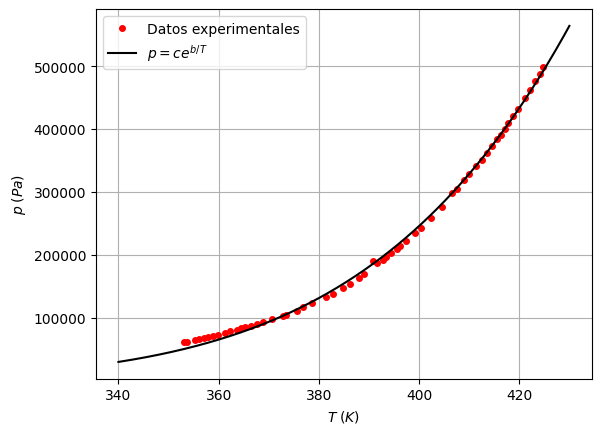

In [12]:
#Ajuste exponencial del agua

par = [10**8,-5000]

exp_c_agua,inc_c_agua = ajuste(exp,par,T_c_agua,p_c_agua)
exp_e_agua, inc_e_agua = ajuste(exp,par,T_e_agua,p_e_agua)

x_c_agua = np.linspace(300,430,400)
x_e_agua = np.linspace(340,430,400)
y_c_agua = exp_c_agua[0]*np.exp(exp_c_agua[1]/x_c_agua)
y_e_agua = exp_e_agua[0]*np.exp(exp_e_agua[1]/x_e_agua)

"""plt.plot(T_c_agua,p_c_agua,'o',color='red',markersize=4,label='Datos experimentales')
plt.plot(x_c_agua,y_c_agua,color='black',label=r'$p=ce^{b/T}$')
plt.xlabel(r'$T\;(K)$')
plt.ylabel(r'$p\;(Pa)$')
plt.legend(loc='upper left')
plt.grid(True)"""

plt.plot(T_e_agua,p_e_agua,'o',color='red',markersize=4,label='Datos experimentales')
plt.plot(x_e_agua,y_e_agua,color='black',label=r'$p=ce^{b/T}$')
plt.xlabel(r'$T\;(K)$')
plt.ylabel(r'$p\;(Pa)$')
plt.legend(loc='upper left')
plt.grid(True)

print(-exp_c_agua[1]*8.314/18)
print(-exp_e_agua[1]*8.314/18)
print(inc_c_agua[1]*8.314/18)
print(inc_e_agua[1]*8.314/18)

l_c_agua_exp = -exp_c_agua[1]*8.314/18
s_l_c_agua_exp = inc_c_agua[1]*8.314/18
l_e_agua_exp = -exp_e_agua[1]*8.314/18
s_l_e_agua_exp = inc_e_agua[1]*8.314/18


In [11]:
# Análisis estadístico de los datos

def pond(x1,x2,w1,w2):
    media = (w1*x1+w2*x2)/(w1+w2)
    inc = 1/sqrt(w1+w2)
    return [media,inc]

def w(s):
    w = 1/s**2
    return w

#Lineales

w_c_oh = w(s_l_c_oh)
w_e_oh = w(s_l_e_oh)
w_c_agua = w(s_l_c_agua)
w_e_agua = w(s_l_e_agua)

lineal_oh = pond(l_c_oh,l_e_oh,w_c_oh, w_e_oh)
lineal_agua = pond(l_c_agua,l_e_agua,w_c_agua, w_e_agua)

print(lineal_oh)
print(lineal_agua)

#Exponenciales

w_c_oh_exp = w(s_l_c_oh_exp)
w_e_oh_exp = w(s_l_e_oh_exp)
w_c_agua_exp = w(s_l_c_agua_exp)
w_e_agua_exp = w(s_l_e_agua_exp)

exp_oh = pond(l_c_oh_exp,l_e_oh_exp,w_c_oh_exp, w_e_oh_exp)
exp_agua = pond(l_c_agua_exp,l_e_agua_exp,w_c_agua_exp, w_e_agua_exp)

print(exp_oh)
print(exp_agua)


[917.6180202399357, 3.2814914669298454]
[2187.5861654277714, 4.74293571952254]
[879.7222133778299, 2.044734318449658]
[2205.60136078089, 3.7184443007911905]
